In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

import mglearn

# SVM(Support Vector Machine)

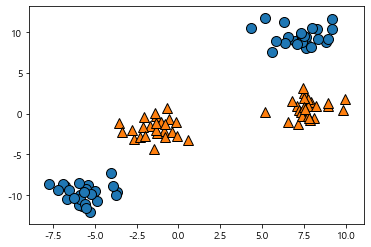

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\cecil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


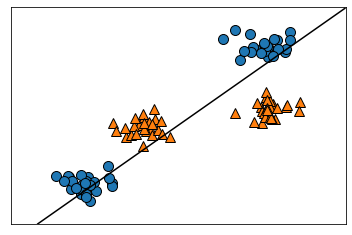

In [18]:
#linearSVC
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
# 산포도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

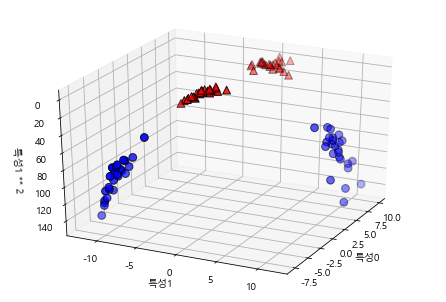

In [19]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\cecil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

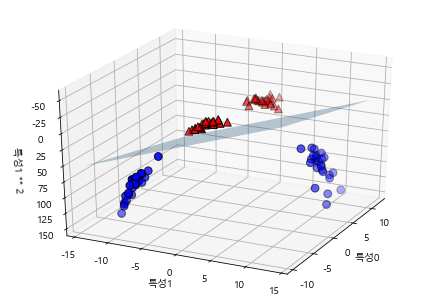

In [20]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

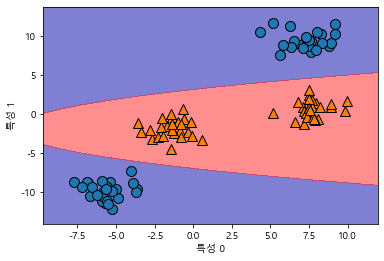

In [21]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 파라미터 : cost, gamma

- cost
    + decision boundary와 마진의 간격을 어느정도로 할지 결정
    + cost가 작으면 마진은 넓어진다.
    

- gamma
    + 훈련데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    + gamma가 적을 경우 영향을 끼치는 범위가 넓어진다.

In [22]:
from sklearn.svm import SVC

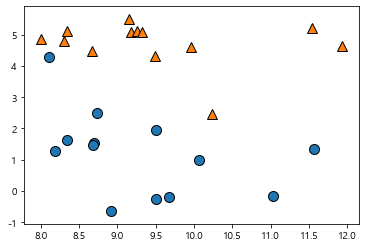

In [23]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [24]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

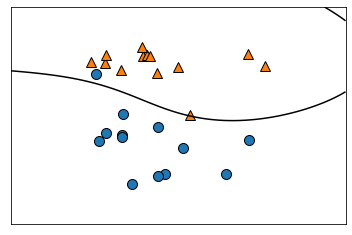

In [25]:
# 그래프
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [29]:
sv = svm.support_vectors_

Text(0, 0.5, '특성 1')

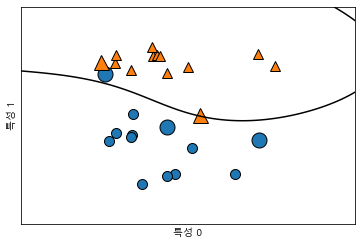

In [33]:
# SV를 그래프에 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

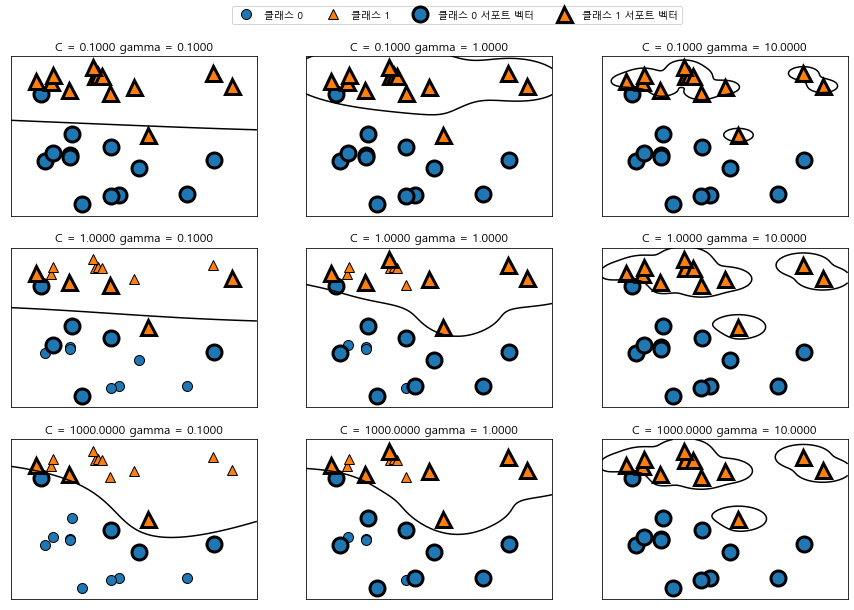

In [34]:
# p.211
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

#### 유방암 데이터셋 활용

In [35]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [36]:
svm = SVC()  #C=1, gamma=1/특성의 갯수(X_train.shape(1))
svm.fit(X_train, y_train)

SVC()

In [38]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.903755868544601
테스트 결과 :  0.9370629370629371


In [47]:
##### 전처리로 스케일 조정 #####

# 특성별 최소값
min_on_training = X_train.min(axis=0)
#print(min_on_training)

# 특성별 최대값
max_on_training = X_train.max(axis=0)
#print(max_on_training)

# 특성별 범위(최대값 = 최소값)
#range_on_training = max_on_training - min_on_training
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

In [48]:
# 다시 훈련
svm2 = SVC().fit(X_train_scaled, y_train)

In [51]:
print("훈련 결과 : ", svm2.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm2.score(X_test_scaled, y_test))

훈련 결과 :  0.9835680751173709
테스트 결과 :  0.972027972027972


In [55]:
# Cost로 성능 튜닝

svm50 = SVC(C=50).fit(X_train_scaled, y_train)

In [56]:
print("훈련 결과 : ", svm50.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm50.score(X_test_scaled, y_test))

훈련 결과 :  0.9953051643192489
테스트 결과 :  0.9790209790209791


In [58]:
# Grid Search
from sklearn.model_selection import GridSearchCV

params = [{"kernel":["rbf"], "gamma":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
           "C":[0.01, 0.1, 1, 10, 100, 1000]}]

gs_svm = GridSearchCV(SVC(), params, cv=10).fit(X_train_scaled, y_train)

In [59]:
print(gs_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [60]:
svm = SVC(C=1, gamma=1).fit(X_train_scaled, y_train)
print("훈련 결과 : ", svm.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm.score(X_test_scaled, y_test))

훈련 결과 :  0.9835680751173709
테스트 결과 :  0.972027972027972


#### 붓꽃 데이터 활용

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [10]:
svm = SVC().fit(X_train, y_train)

In [11]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.9714285714285714
테스트 결과 :  0.9777777777777777


In [14]:
svm = SVC(kernel='linear', C=1, gamma=1e-6).fit(X_train, y_train)

In [15]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.9714285714285714
테스트 결과 :  0.9777777777777777


#### 농구 선수의 포지션 예측

- SG : Shooting Gard
- C : Center
- TRB : Total 리바운드
- BLK : Blocking

In [16]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [17]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

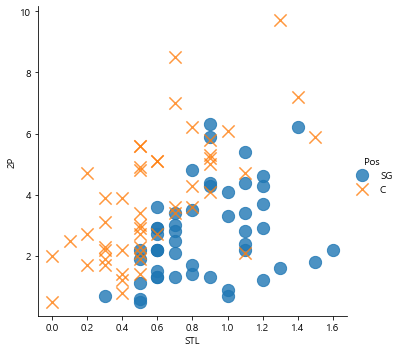

In [20]:
##### 불필요한 특성을 구분하기 위한 시각화 #####

# 스틸, 2점슛
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

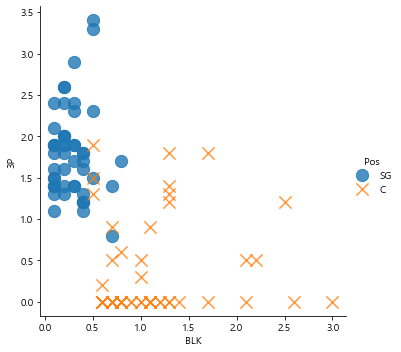

In [21]:
# 블록킹, 3점슛
sns.lmplot("BLK", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

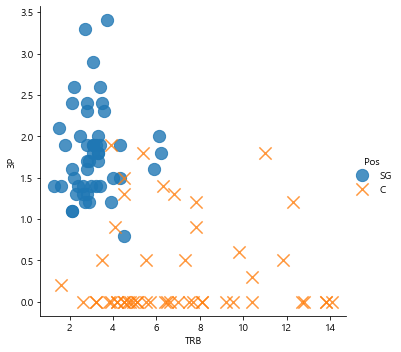

In [22]:
# 리바운드, 3점슛
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

In [25]:
# 불필요한 특성 제거
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [26]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [30]:
# 훈련, 테스트 데이터 나누기
train, test = train_test_split(df, test_size=0.2)

In [29]:
import pickle

In [31]:
# 2진 파일로 저장(직렬화(Serialize))

train_data = open("data/basketball_train.pkl", "wb")
pickle.dump(train, train_data)

test_data = open("data/basketball_test.pkl", "wb")
pickle.dump(test, test_data)

train_data.close()
test_data.close()

In [33]:
# 파일 불러오기

with open("data/basketball_train.pkl", "rb") as train_data:
    train = pickle.load(train_data)
    
with open("data/basketball_test.pkl", "rb") as test_data:
    test = pickle.load(test_data)

In [36]:
train.head()
test.head()

,Player,Pos,3P,TRB,BLK
9,Bismack Biyombo,C,0.0,7.0,1.1
11,Andrew Bogut,C,0.0,8.1,0.9
42,Joe Harris,SG,1.6,2.8,0.2
69,Salah Mejri,C,0.0,4.2,0.8
43,John Henson,C,0.0,5.1,1.3


In [40]:
# 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train = train[["3P", "TRB", "BLK"]]
y_train = train["Pos"]

params = [{"kernel":["rbf", "linear"], 
           "gamma":[0.00001, 0.0001, 0.001, 0.1, 1],
           "C":[0.01, 0.1, 1, 10, 100, 1000]}]

svm = GridSearchCV(SVC(), params, cv=10).fit(X_train, y_train)

In [41]:
print(svm.best_params_)

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}


In [43]:
# 테스트
X_test = test[["3P", "TRB", "BLK"]]
y_test = test["Pos"]

pred = svm.predict(X_test)

In [44]:
print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 :  0.95
              precision    recall  f1-score   support

           C       1.00      0.88      0.93         8
          SG       0.92      1.00      0.96        12

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [45]:
df_compare = pd.DataFrame({"prediction":pred, "truth":y_test})
df_compare

,prediction,truth
9,C,C
11,C,C
42,SG,SG
69,C,C
43,C,C
74,C,C
4,SG,SG
65,SG,SG
21,SG,SG
12,SG,SG


#### 이미지 내부의 문자 인식(p.180)

In [46]:
import urllib.request as req
import gzip, os, os.path
savepath = "./data/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]
# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [47]:
import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)
to_csv("t10k", 500)

In [ ]:
"""
포터블 비트맵(Potable Bitmaps)
1, pgm : 한 화소(픽셀)를 1byte(2의 8승=255)로 표현(흑백)
    - P2, P5
2. pbm : 한 화소를 1bite로 표현(훨씬 더 작은 값으로 색상 표현, tambem 흑백)
    - P1, P4
3. ppm : 한 화소를 3byte로 표현(R,G, B)(다양한 색상 표현)
    - P3, P6
"""

In [48]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [54]:
print(data["images"][7])
print(data["labels"][7])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1484375, 0.16796875, 0.41015625, 0.99609375, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.6796875, 0.0234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16796875, 0.54296875, 0.875, 0.8828125

In [55]:
# 학습
model = SVC().fit(data["images"], data["labels"])

In [56]:
# 예측
pred = model.predict(test["images"])

In [58]:
# 결과
print("정확도 : ", accuracy_score(test["labels"], pred))
print(classification_report(test["labels"], pred))

정확도 :  0.9560878243512974
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.98      0.96      0.97        55
           3       0.93      0.91      0.92        46
           4       0.93      0.98      0.96        55
           5       0.92      0.94      0.93        50
           6       0.98      0.93      0.95        43
           7       0.94      0.96      0.95        49
           8       0.93      0.97      0.95        40
           9       1.00      0.91      0.95        54

    accuracy                           0.96       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.96      0.96       501



In [64]:
# 아무 이미지나 넣어보기
pred1 = model.predict([test["images"][399]])
pred1

array([4])

In [63]:
# 정답확인
test["labels"][399]

4

In [65]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [68]:
# 일반 문자열dmf HTML로 바꿔 웹브라우저로 보여주는 객체
from IPython.display import HTML
HTML(input_form + javascript)

In [73]:
# 위에 그린 이미지 확인
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [85]:
pred2 = model.predict([image])
pred2

array([4])